In [4]:
%matplotlib inline
import pandas as pd

In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [7]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Lucky Number,2015,USA,2015-09-01


In [8]:
release_dates.shape

(428627, 4)

In [11]:
r = release_dates.copy()
r[r.country == 'China'].shape
r[r.country == 'China'].head(30)

,title,year,country,date
765,"10,000 BC",2008,China,2008-03-21
839,100% Kiss,2012,China,2012-01-01
933,101 ci qiu hun,2013,China,2013-02-12
1107,12 Citizens,2014,China,2015-05-15
1902,1980 nian dai de ai qing,2015,China,2015-09-11
2385,2012,2009,China,2009-11-13
2508,21 & Over,2013,China,2014-11-21
3015,27 Dresses,2008,China,2008-05-23
3295,3 Idiots,2009,China,2011-12-08
3782,33 Postcards,2011,China,2011-09-02


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

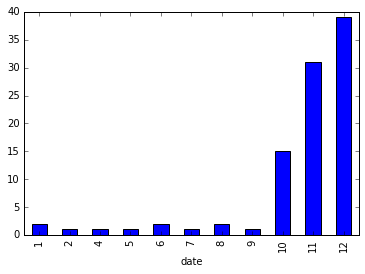

In [22]:
r = release_dates[release_dates.title.str.contains("Christmas", case = False) & (release_dates.country == 'USA')].copy()
# r.date.dt.month.value_counts().sort_index().plot(kind = "bar")
groups = r.groupby(r.date.dt.month)
groups.size().plot(kind = "bar")


### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

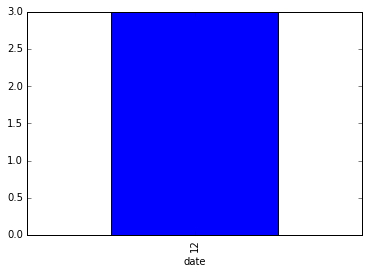

In [24]:
r = release_dates[release_dates.title.str.startswith("The Hobbit") & (release_dates.country == 'USA')].copy()
# r.date.dt.month.value_counts().sort_index().plot(kind = "bar")
groups = r.groupby(r.date.dt.month)
groups.size().plot(kind = "bar")


### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

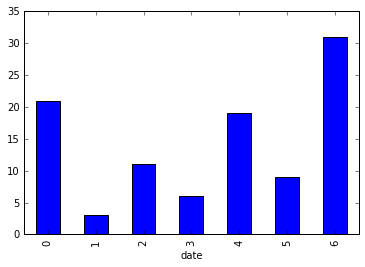

In [25]:
r = release_dates[release_dates.title.str.contains("Romance", case = False) & (release_dates.country == 'USA')].copy()
# r.date.dt.month.value_counts().sort_index().plot(kind = "bar")
groups = r.groupby(r.date.dt.dayofweek)
groups.size().plot(kind = "bar")

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

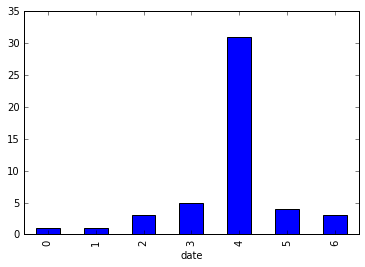

In [26]:
r = release_dates[release_dates.title.str.contains("Action", case = False) & (release_dates.country == 'USA')].copy()
# r.date.dt.month.value_counts().sort_index().plot(kind = "bar")
groups = r.groupby(r.date.dt.dayofweek)
groups.size().plot(kind = "bar")

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [43]:
c = cast.copy()
r = release_dates.copy()
c.head()
t_jd = c[c.name == 'Judi Dench'].title
r = r[(r.country == "USA") & r.title.isin(t_jd) & (r.year // 10 == 199)]
r

,title,year,country,date
8177,A Midsummer Night's Dream,1999,USA,1999-05-14
125096,GoldenEye,1995,USA,1995-11-17
131448,Hamlet,1990,USA,1991-01-18
131464,Hamlet,1996,USA,1996-12-25
160104,Jack & Sarah,1995,USA,1996-03-22
161234,Jane Eyre,1996,USA,1996-04-12
225836,Mrs Brown,1997,USA,1997-10-03
289605,Shakespeare in Love,1998,USA,1999-01-08
318082,Tea with Mussolini,1999,USA,1999-05-14
385147,The World Is Not Enough,1999,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

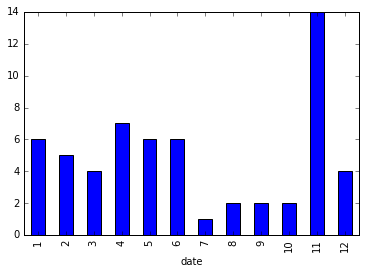

In [53]:
c = cast.copy()
r = release_dates.copy()
usa = r[r.country == 'USA']
judy = c[c.name == 'Judi Dench']
rel = judy.merge(usa, how='inner', on='title')
rel.groupby(rel.date.dt.month).size().plot(kind = "bar")

### In which months do films with Tom Cruise tend to be released in the USA?

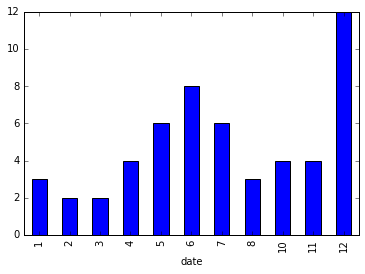

In [54]:
c = cast.copy()
r = release_dates.copy()
usa = r[r.country == 'USA']
judy = c[c.name == 'Tom Cruise']
rel = judy.merge(usa, how='inner', on='title')
rel.groupby(rel.date.dt.month).size().plot(kind = "bar")